In [38]:
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 깨짐 방지
if platform.system() == 'Darwin':
    # 맥일때
    plt.rcParams["font.family"] = 'AppleGothic'
elif platform.system() == 'Windows':
    # 윈도우일때
    plt.rcParams["font.family"] = 'Malgun Gothic'

# 마이너스기호(-) 폰트 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [39]:
# 데이터 디렉토리 파일 확인
import os
print(os.listdir("../input_2019-2nd-ml-month-with-kakr/"))

['test.csv', 'train.csv', 'sample_submission.csv']


In [40]:
# train, test 데이터 read(dataframe)
train = pd.read_csv("../input_2019-2nd-ml-month-with-kakr/train.csv")
test = pd.read_csv("../input_2019-2nd-ml-month-with-kakr/test.csv")

In [41]:
train.shape

(15035, 21)

In [42]:
test.shape

(6468, 20)

### Regression Model
* Decition Tree
* Support Vector Machine
* Random Forest
* kNN
* GLM

In [43]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [45]:
# train 데이터셋을 학습에 사용할 train feature 데이터프레임에 추가(price 칼럼 제외)
X_train = train.drop("price", axis=1)

In [46]:
# date(날짜), zipcode(우편번호), ID 칼럼 삭제
del X_train["date"]
del X_train["zipcode"]
del X_train["id"]

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 17 columns):
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(4), int64(13)
memory usage: 2.0 MB


In [48]:
# 학습 결과 확인용 lable만으로 데이터 프레임 제작
Y_train = train["price"]

In [49]:
# 위와 같은 방법으로 결과 테스트(예측)를 위한 데이터 프레임 카피
X_test = test.copy()
del X_test["id"]
del X_test["date"]
del X_test["zipcode"]

In [50]:
# Decision Tree Regressor를 이용한 훈련
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

decition_tree_regressor = DecisionTreeRegressor()
decition_tree_regressor.fit(X_train, Y_train)
Y_pred = decition_tree_regressor.predict(X_train)
decition_tree_regressor_mse = mean_squared_error(Y_pred, Y_train)
decition_tree_regressor_rmse = np.sqrt(decition_tree_regressor_mse)
decition_tree_regressor_rmse

0.0

In [51]:
# 데이터셋 분할하여 확인
from sklearn.model_selection import cross_val_score

scores = cross_val_score(decition_tree_regressor, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [197601.80533504 221591.33464814 169528.00554075 182466.51144033
 163928.77316213 217272.69240797 191219.55074135 185040.3284433
 170489.66960298 163056.92478383]
Mean: 186219.55961058236
Standard deviation: 19861.810443963725


In [53]:
# Random Forest Regressor를 이용한 훈련
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, Y_train)
Y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(Y_pred, Y_train)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/anaconda3/envs/pstudy/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


60187.21698036615

In [54]:
# 나무 100개로 훈련
forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(X_train, Y_train)
Y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(Y_pred, Y_train)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

49243.9178635687

In [32]:
scores = cross_val_score(forest_reg, X_train, Y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(forest_rmse_scores)

Scores: [150599.84679711 150897.65655003 118851.28636534 143308.67047512
 125472.45142962 146723.18248035 142619.88189164 118609.89705574
 124261.14359087 130457.15865743]
Mean: 135180.1175293243
Standard deviation: 12314.41003858767


In [55]:
# Random Forest로 정답제출용 submission 데이터프레임 작성

forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(X_train, Y_train)
Y_pred = forest_reg.predict(X_test)

submission = pd.DataFrame({
        "id": test["id"],
        "price": Y_pred
    })
submission.shape

(6468, 2)

In [56]:
submission.head(10)

,id,price
0,15035,489533.50
1,15036,471463.50
2,15037,1408244.20
3,15038,291687.00
4,15039,319722.25
5,15040,323292.23
6,15041,478628.00
7,15042,702047.63
8,15043,310405.24
9,15044,595054.00


In [57]:
# 정답제출용 데이터 프레임으로 정답제출 파일 작성
submission.to_csv('submission_HPP_rf.csv', index=False)

In [58]:
# SVM으로 진행
from sklearn.svm import LinearSVR

svr = LinearSVR(epsilon=0, max_iter=2000)
svr.fit(X_train, Y_train)
Y_pred = svr.predict(X_test)

submission = pd.DataFrame({
        "id": test["id"],
        "price": Y_pred
    })

submission.to_csv('submission_HPP_svr.csv', index=False)

/anaconda3/envs/pstudy/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [59]:
submission.head(10)

,id,price
0,15035,652233.914629
1,15036,426585.972366
2,15037,708213.242319
3,15038,423854.086055
4,15039,469404.340791
5,15040,514594.155915
6,15041,371131.532320
7,15042,602775.080564
8,15043,292948.104210
9,15044,367534.073791


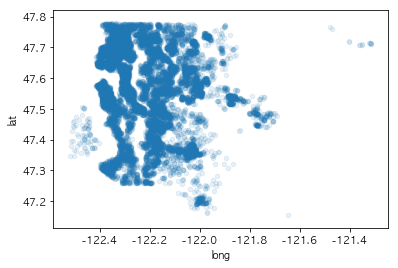

In [60]:
# 트레인 데이터 위도/경도 시각화
X_train.plot(kind="scatter", x="long", y="lat", alpha=0.1)

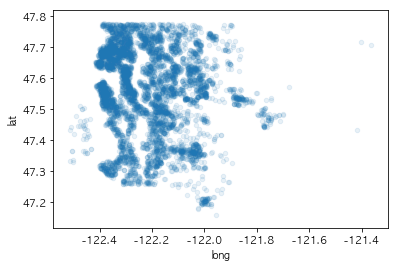

In [61]:
# 테스트 데이터 위도/경도 시각화
X_test.plot(kind="scatter", x="long", y="lat", alpha=0.1)